# Backtest under 60 lines.

Vectorised backtesting

[Time Series Momentum](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2089463)

In [1]:
                                                                          #1
%matplotlib inline 

import numpy as np                                                        #2
import pandas as pd                                                       #3
import oandapyV20                                                         #4
from oandapyV20 import API                                                #5
import oandapyV20.endpoints.instruments as instruments                    #6
import configparser                                                       #7

import seaborn as sns                                                     #8
import matplotlib.pyplot as plt                                           #9

config = configparser.ConfigParser()                                      #10
config.read('../config/config_v20.ini')                                   #11
accountID = config['oanda']['account_id']                                 #12
access_token = config['oanda']['api_key']                                 #13

client = oandapyV20.API(access_token=access_token,environment="practice") #14

In [2]:
params = {                                                                #15
          "count": 5000,                                                  #16
          "granularity": "D"}                                             #17
r = instruments.InstrumentsCandles(instrument="USD_JPY",                  #18
                                   params=params)                         #19
res = client.request(r)['candles']                                        #20

In [3]:
df = pd.DataFrame([[oo['time'], oo['volume'], float(oo['mid']['o']),      #21
                    float(oo['mid']['h']), float(oo['mid']['l']),         #22
                    float(oo['mid']['c'])] for oo in res],                #23
                 columns=['time', 'vol', 'open', 'high', 'low', 'close']) #24

In [4]:
df['time'] = pd.to_datetime(df['time'])                                   #25
df.set_index('time', inplace=True)                                        #26

In [5]:
df['asset_return'] = df['close'].pct_change()                             #27

In [6]:
dtrain = df[0:3000].copy()                                                #28
dtest = df[3000:].copy()                                                  #29

In [7]:
df.head(5)                                                                #30

,vol,open,high,low,close,asset_return
time,,,,,,
2003-06-01 21:00:00+00:00,1,118.615,118.615,118.615,118.615,NaN
2003-06-02 21:00:00+00:00,1,119.165,119.165,119.165,119.165,0.004637
2003-06-03 21:00:00+00:00,1,118.855,118.855,118.855,118.855,-0.002601
2003-06-04 21:00:00+00:00,1,117.745,117.745,117.745,117.745,-0.009339
2003-06-05 21:00:00+00:00,1,118.660,118.660,118.660,118.660,0.007771


# Experiment With the Training Data Set

In [37]:
k = range(10, 300, 10)    # average window length                                   #31
h = 1     # holding period of 1                                                     #32

In [38]:
for oo in k:                                                                        #33
    dtrain['signal'] = np.sign(dtrain['asset_return'].rolling(oo).sum())            #34
    dtrain['strategy_rtn'] =  dtrain['signal'].shift(1) * dtrain['asset_return']    #35
    res = dtrain['strategy_rtn'].dropna().sum()                                     #36
    print('{0:3} {1:>8.4f}'.format(oo, res))                                        #37

 10  -0.0160
 20  -0.0169
 30  -0.1823
 40  -0.3065
 50  -0.0838
 60   0.0842
 70   0.0125
 80  -0.2097
 90  -0.0056
100  -0.0315
110  -0.1017
120   0.0985
130  -0.2170
140   0.0325
150  -0.0254
160   0.1568
170   0.0049
180  -0.3261
190  -0.5090
200  -0.2855
210  -0.4731
220  -0.6757
230  -0.2821
240  -0.3416
250  -0.2569
260  -0.1235
270  -0.0049
280  -0.0457
290   0.1176


***

# Vectorized Backtesting With the Test Set - Momentum

Note: we use the k=11,h=1 combination as it has the highest returns in the training set 

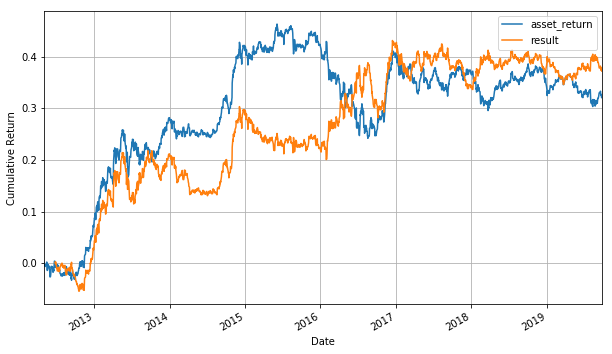

In [41]:
dtest['signal'] = np.sign(dtest['asset_return'].rolling(50).sum())                  #38
dtest['result'] = dtest['signal'].shift(1) * dtest['asset_return']                  #39
                                                                
dtest['asset_return'].dropna().cumsum().plot(figsize=(10,6))                        #40
dtest['result'].dropna().cumsum().plot(figsize=(10,6))                              #41

plt.xlabel('Date')                                                                  #42
plt.ylabel('Cumulative Return')                                                     #43
plt.grid(True)                                                                      #44
plt.legend()                                                                        #45

# Vectorized Backtesting With the Test Set - Reversion

Note: we use the k=3,h=1 combination as it has the highest returns in the training set for a reversion strategy

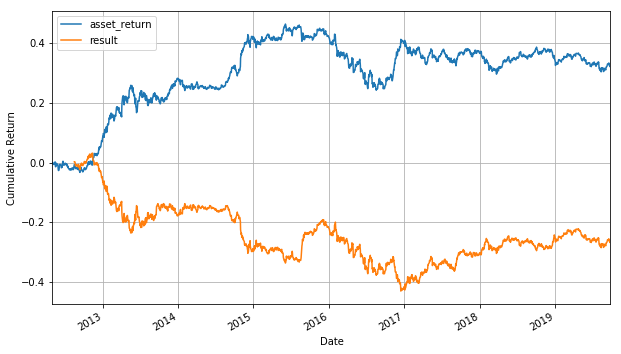

In [42]:
dtest['signal'] = - np.sign(dtest['asset_return'].rolling(90).sum())               #46
dtest['result'] = dtest['signal'].shift(1) * dtest['asset_return']                 #47
                                                                                     
dtest['asset_return'].dropna().cumsum().plot(figsize=(10,6))                       #48
dtest['result'].dropna().cumsum().plot(figsize=(10,6))                             #49

plt.xlabel('Date')                                                                 #50
plt.ylabel('Cumulative Return')                                                    #51
plt.grid(True)                                                                     #52
plt.legend()                                                                       #53